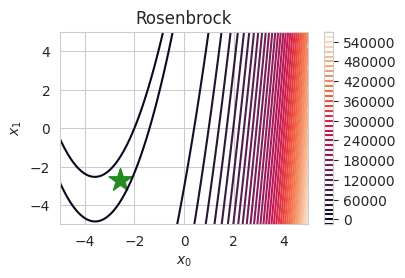

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ioh
from carps.analysis.utils import setup_seaborn, savefig

setup_seaborn()

problem = ioh.get_problem(fid=8, dimension=2, instance=0)
ros = problem

# Grid
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)

# Variations
translations = [
    np.array([0.0, 0.0]),
    np.array([0.5, 0.5]),
    np.array([-1.0, 1.0]),
    np.array([1.5, -0.5]),
    np.array([-2.0, -2.0]),
]
scales = [1.0, 0.5, 2.0, 1.5, 0.8]

plt.figure(figsize=(4,2.5))
Z = np.vectorize(lambda a, b: ros([a, b]))(X, Y)
plt.contour(X, Y, Z, levels=50)
plt.colorbar()
x_opt = problem.optimum.x
plt.scatter(*x_opt, color="forestgreen", marker="*", s=300)
plt.title("Rosenbrock")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
savefig(plt.gcf(), "figures/dacbo/rosenbrock")
plt.show()


In [25]:
import importlib
import optbench.functions as obf
importlib.reload(obf)
import numpy as np
from optbench.functions import Hartmann6, Hartmann3, Hartmann4

hm = Hartmann4()

y_min = hm.f_min
x_min = hm.x_min
# y_min_calc = hm._function(x_min)
# y_min, y_min_calc


In [27]:
def get_n_trials(dimension: int) -> int:
    return int(np.ceil(20 + 40 * np.sqrt(dimension)))

get_n_trials(3), get_n_trials(4), get_n_trials(6)

(90, 100, 118)

# Plot Rosenbrock and OptBench

Rosenbrock
Levy
Schwefel
Ackley


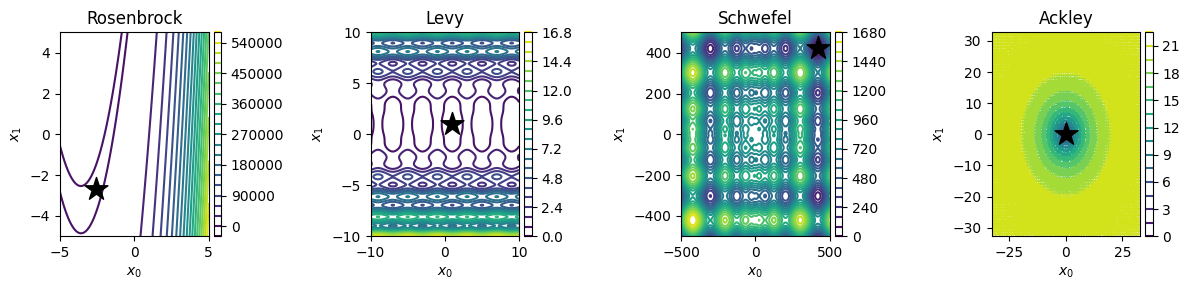

In [ ]:
from carps.objective_functions.bbob import BBOBObjectiveFunction
from optbench.functions import Levy, Schwefel, Ackley, Hartmann6
import matplotlib.pyplot as plt
import seaborn as sns
from ConfigSpace import Configuration
from carps.utils.trials import TrialInfo, TrialValue
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

funcs = [
    BBOBObjectiveFunction(fid=8, instance=0, dimension=2, seed=None),
    Levy(dim=2),
    Schwefel(dim=2),
    Ackley(dim=2),
    # Hartmann6()
]
names = [
    "Rosenbrock", "Levy", "Schwefel", "Ackley", "Hartmann6"
]
fig = plt.figure(figsize=(len(funcs) * 3, 3))
axes = fig.subplots(nrows=1, ncols=len(funcs), sharex=False, sharey=False)

n_points = 300
for i, func in enumerate(funcs):
    print(names[i])
    ax = axes[i]
    if len(func.configspace) > 2:
        print(f"Skip {names[i]}")
        continue
    # Grid
    hps = list(dict(func.configspace).values())
    x = np.linspace(hps[0].lower, hps[0].upper, n_points)
    y = np.linspace(hps[1].lower, hps[1].upper, n_points)
    X, Y = np.meshgrid(x, y)
    # def evaluate(a, b):
    #     config = Configuration(configuration_space=func.configspace, vector=np.array([a, b]))
    #     ti = TrialInfo(config=config)
    #     tv = func.evaluate(trial_info=ti)
    #     return tv.cost
    # Z = np.vectorize(evaluate)(X, Y)
    if isinstance(func, BBOBObjectiveFunction):
        Z = np.vectorize(lambda a, b: func._problem([a, b]))(X, Y)
        x_opt = func._problem.optimum.x
    else:
        Z = np.vectorize(lambda a, b: func._function([a, b]))(X, Y)
        x_opt = func.x_min
    cp = ax.contour(X, Y, Z, levels=20)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    ax.set_aspect("equal")
    fig.colorbar(cp, ax=ax, cax=cax)

    if x_opt is not None:
        ax.scatter(*x_opt, color="black", marker="*", s=300, zorder=99999)
    ax.set_title(names[i])
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    # break
fig.tight_layout()

plt.show()